In [1]:
# qbOS optimization module
import qbos_op
import xacc

# Get qbOS VQE 
vqe = qbos_op.vqe(True)
vqe.sn = 0   # No shots - deterministic VQE

# Some more settings
vqe.ansatz = "uccsd"
vqe.maxeval = 400

# H2 specific
vqe.qn = 4  # Number of qubits (number of spin orbitals)
vqe.uccsdn = 2  # Number of electrons/particles

In [32]:
import numpy as np

# define range of distances
r_list = np.arange(0.235,2.235,0.1)

# empty list for energy outputs
optimum_energy = []

In [33]:
# loop over distance range, to get energies
for r in r_list:
    # H2 geometry
    vqe.geometry = "H 0.0 0.0 0.0; H 0.0 0.0 " + str(r) #unit: Angstrom

    # run
    vqe.run()
    optimum_energy.append(vqe.out_energy[0][0][0])

Invoked run()
N_ii: 1
N_jj: 1
Geometry:
H 0.0 0.0 0.0; H 0.0 0.0 0.235
Pauli Observable: 
(1.87215401297,0) + (0.0397148260207,0) X0 X1 X2 X3 + (0.0397148260207,0) X0 X1 Y2 Y3 + (0.0397148260207,0) Y0 Y1 X2 X3 + (0.0397148260207,0) Y0 Y1 Y2 Y3 + (0.274209753358,0) Z0 + (0.148070792528,0) Z0 Z1 + (0.190067730431,0) Z0 Z2 + (0.187785618548,0) Z0 Z3 + (-0.614776596717,0) Z1 + (0.187785618548,0) Z1 Z2 + (0.199017039975,0) Z1 Z3 + (0.274209753358,0) Z2 + (0.148070792528,0) Z2 Z3 + (-0.614776596717,0) Z3
Invoked run on Experiment 0, name: -unnamed experiment- ; Condition 0, name: -unnamed condition-
Number of shots [sn]: 0
Number of qubits [qn]: 4
Number of optimiser evaluations [maxeval]: 400
Using deterministic VQE...
Parameters to optimise [theta]: [1]
Ansatz [ansatz]: uccsd
Hamiltonian [ham]: (1.87215401297,0) + (0.0397148260207,0) X0 X1 X2 X3 + (0.0397148260207,0) X0 X1 Y2 Y3 + (0.0397148260207,0) Y0 Y1 X2 X3 + (0.0397148260207,0) Y0 Y1 Y2 Y3 + (0.274209753358,0) Z0 + (0.148070792528,0)

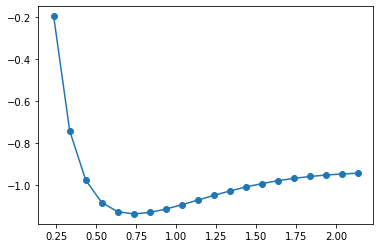

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# plot energy vs distance
fig, ax = plt.subplots()
ax.plot(r_list, optimum_energy, linestyle = 'solid', marker = 'o')
plt.show()